## Identifying and removing outliers

In [1]:
%matplotlib inline

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14,6))

In [10]:
dataset = pd.read_csv('data/rental_residence.csv', sep=";")

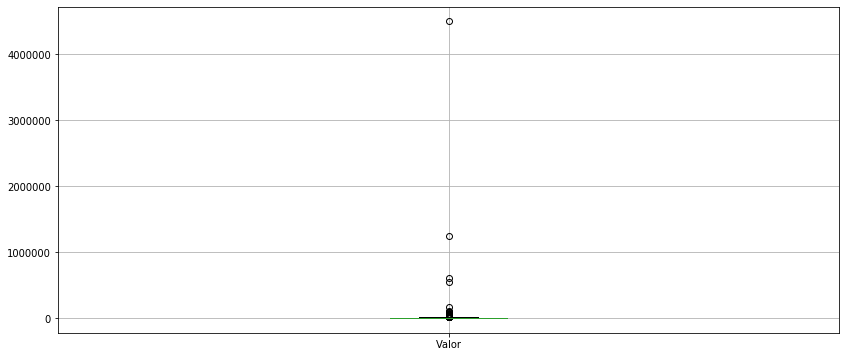

In [11]:
dataset.boxplot(['Valor'])

In [14]:
dataset[dataset['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Aggregate Type
7202,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11945,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13055,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
14630,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [17]:
values = dataset['Valor']

In [18]:
type(values)

pandas.core.series.Series

In [23]:
q1 = values.quantile(.25)
q3 = values.quantile(.75)
iiq = q3 - q1
lower_limit = q1 - 1.5 * iiq
upper_limit = q3 + 1.5 * iiq

In [25]:
select = (values >= lower_limit ) & (values <= upper_limit)
dataset_new = dataset[select]

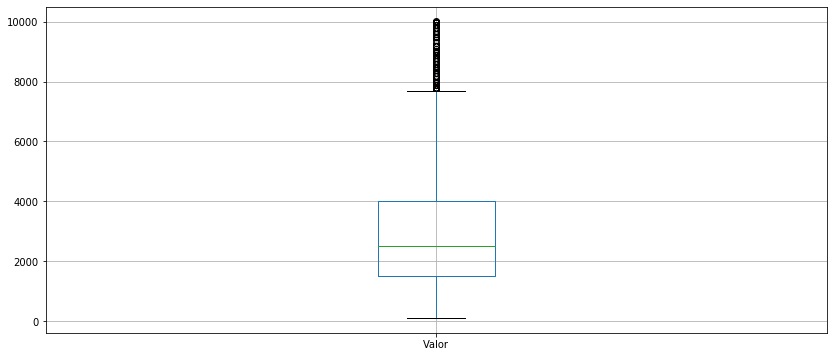

In [26]:
dataset_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f57bd0>]],
      dtype=object)

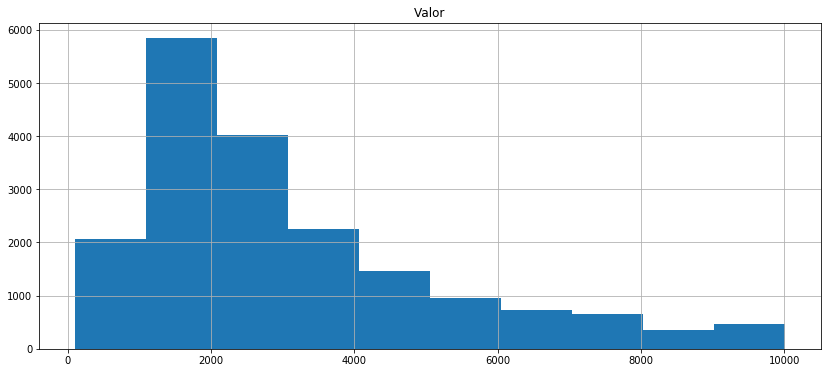

In [27]:
dataset_new.hist(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119200210>]],
      dtype=object)

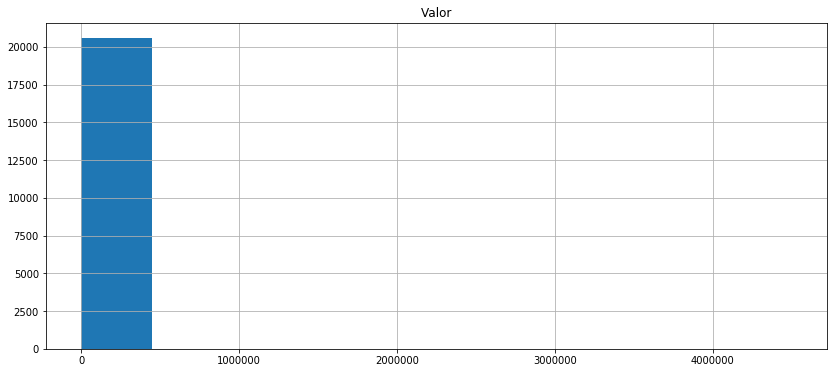

In [28]:
dataset.hist(['Valor'])

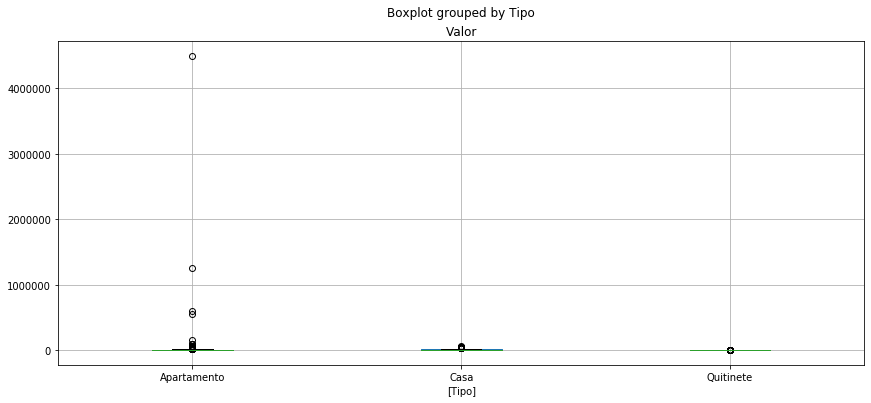

In [29]:
dataset.boxplot(['Valor'],by = ['Tipo'])

In [33]:
type_group = dataset.groupby('Tipo')['Valor']
type_group

In [34]:
type_group.groups

{'Apartamento': Int64Index([    2,     3,     4,     5,     6,     7,     9,    10,    11,
                12,
             ...
             20569, 20570, 20572, 20573, 20574, 20575, 20576, 20578, 20579,
             20580],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    18,    49,    52,    89,    93,   137,   153,   171,
               224,
             ...
             20357, 20380, 20388, 20437, 20442, 20466, 20518, 20540, 20550,
             20560],
            dtype='int64', length=965),
 'Quitinete': Int64Index([    0,     8,    24,    65,    72,    79,    94,   113,   139,
               165,
             ...
             20173, 20198, 20224, 20426, 20452, 20457, 20491, 20511, 20571,
             20577],
            dtype='int64', length=836)}

In [35]:
q1 = type_group.quantile(.25)
q3 = type_group.quantile(.75)
iiq = q3 - q1
lower_limit = q1 - 1.5 * iiq
upper_limit = q3 + 1.5 * iiq

In [36]:
q1

Tipo
Apartamento    1700.0
Casa           1100.0
Quitinete       900.0
Name: Valor, dtype: float64

In [37]:
q3

Tipo
Apartamento    5000.0
Casa           9800.0
Quitinete      1500.0
Name: Valor, dtype: float64

In [38]:
iiq

Tipo
Apartamento    3300.0
Casa           8700.0
Quitinete       600.0
Name: Valor, dtype: float64

In [39]:
lower_limit

Tipo
Apartamento    -3250.0
Casa          -11950.0
Quitinete          0.0
Name: Valor, dtype: float64

In [40]:
upper_limit

Tipo
Apartamento     9950.0
Casa           22850.0
Quitinete       2400.0
Name: Valor, dtype: float64

In [44]:
# Select a values on Series
upper_limit['Apartamento']

9950.0

In [47]:
dataset_new = pd.DataFrame()
for itemType in type_group.groups.keys():
    isType = dataset['Tipo'] == itemType
    inboundLimits = (dataset['Valor'] >= lower_limit[itemType]) & (dataset['Valor'] <= upper_limit[itemType])
    select = isType & inboundLimits
    dataset_selected = dataset[select]
    dataset_new = pd.concat([dataset_new, dataset_selected])

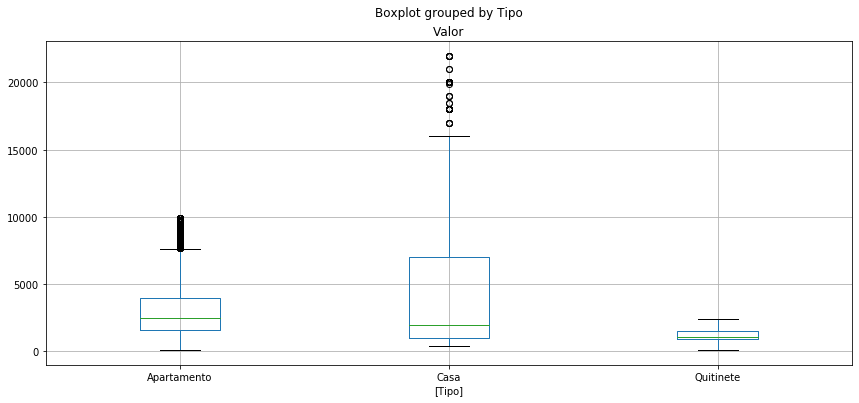

In [48]:
dataset_new.boxplot(['Valor'], by = ['Tipo'])

In [49]:
dataset_new.to_csv('data/rental_residence_with_no_outliers.csv', sep=";", index=False)